**✅ Step 1: Import libraries and setup Environment**

In [23]:
!pip install scikit-learn
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.3

In [ ]:
!pip install pandas

In [29]:
import pandas as pd

df = pd.read_csv('vehicles.csv')
df = df[['price', 'year', 'odometer', 'manufacturer', 'fuel',
         'transmission', 'drive', 'type', 'paint_color']]
df.head()

,price,year,odometer,manufacturer,fuel,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**✅ Step 2: Explore the Dataset**

In [30]:
df.info

<bound method DataFrame.info of         price    year  odometer manufacturer    fuel transmission drive  \
0        6000     NaN       NaN          NaN     NaN          NaN   NaN   
1       11900     NaN       NaN          NaN     NaN          NaN   NaN   
2       21000     NaN       NaN          NaN     NaN          NaN   NaN   
3        1500     NaN       NaN          NaN     NaN          NaN   NaN   
4        4900     NaN       NaN          NaN     NaN          NaN   NaN   
...       ...     ...       ...          ...     ...          ...   ...   
426875  23590  2019.0   32226.0       nissan     gas        other   fwd   
426876  30590  2020.0   12029.0        volvo     gas        other   fwd   
426877  34990  2020.0    4174.0     cadillac  diesel        other   NaN   
426878  28990  2018.0   30112.0        lexus     gas        other   fwd   
426879  30590  2019.0   22716.0          bmw     gas        other   rwd   

             type paint_color  
0             NaN         NaN  
1  

In [31]:
df.isnull().sum().sort_values(ascending=False)

drive           130567
paint_color     130203
type             92858
manufacturer     17646
odometer          4400
fuel              3013
transmission      2556
year              1205
price                0
dtype: int64

In [32]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


✅ **Step 3: Choose Relevant Columns**

Let’s keep only the columns that are:

-	Commonly used to predict price
-	Have few or no missing values
-	Are relatively clean or easy to process

**🧹 Step 4: Clean and Prepare the Data**

In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('vehicles.csv')

# ✅ Select relevant columns including new ones
df = df[['price', 'year', 'odometer', 'manufacturer', 'fuel',
         'transmission', 'drive', 'type', 'paint_color', 'condition', 'cylinders']]

# ✅ Drop rows with missing values
df = df.dropna()

# ✅ Remove unrealistic prices and values
df = df[(df['price'] > 1000) & (df['price'] < 60000)]
df = df[(df['odometer'] < 300000) & (df['year'] > 1990)]

# ✅ Reset index
df.reset_index(drop=True, inplace=True)

# ✅ Check shape
print("Final cleaned dataset shape:", df.shape)
df.head()

Final cleaned dataset shape: (104164, 11)


,price,year,odometer,manufacturer,fuel,transmission,drive,type,paint_color,condition,cylinders
0,15000,2013.0,128000.0,ford,gas,automatic,rwd,truck,black,excellent,6 cylinders
1,27990,2012.0,68696.0,gmc,gas,other,4wd,pickup,black,good,8 cylinders
2,34590,2016.0,29499.0,chevrolet,gas,other,4wd,pickup,silver,good,6 cylinders
3,35000,2019.0,43000.0,toyota,gas,automatic,4wd,truck,grey,excellent,6 cylinders
4,29990,2016.0,17302.0,chevrolet,gas,other,4wd,pickup,red,good,6 cylinders


✅ **Step 5: Encode Categorical Columns**

Dataset still includes text columns like fuel, transmission, drive, etc.
To use them in a machine learning model, we need to convert them to numbers using OneHotEncoding.

🔹 Define Features (X) and Target (y)

In [34]:
X = df.drop(columns='price')  # all input features
y = df['price']               # target variable

🔹 Check Column Types

In [35]:
#This helps confirm which columns are categorical.

X.dtypes


year            float64
odometer        float64
manufacturer     object
fuel             object
transmission     object
drive            object
type             object
paint_color      object
condition        object
cylinders        object
dtype: object

**✅ Step 6: Build the ML Pipeline**

In [37]:
# ✅ Step 1: Install and import libraries
# !pip install scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Step 2: Load and explore the dataset
df = pd.read_csv('vehicles.csv')
df = df[['price', 'year', 'odometer', 'manufacturer', 'fuel',
         'transmission', 'drive', 'type', 'paint_color', 'condition', 'cylinders']]
df = df.dropna()
# ✅ Remove unrealistic prices and values
df = df[(df['price'] > 1000) & (df['price'] < 60000)]
df = df[(df['odometer'] < 300000) & (df['year'] > 1990)]
df.reset_index(drop=True, inplace=True)

# ✅ Step 3: Define features and target
X = df.drop(columns='price')
y = df['price']

# ✅ Step 4: Specify column types
categorical_cols = ['manufacturer', 'fuel', 'transmission', 'drive',
                    'type', 'paint_color', 'condition', 'cylinders']
numeric_cols = ['year', 'odometer']

# ✅ Step 5: Create preprocessing pipeline
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# ✅ Step 6: Choose model (change this to LinearRegression() or RandomForestRegressor())
regressor = LinearRegression()
# regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Optional

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# ✅ Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 8: Train the model
model.fit(X_train, y_train)

# ✅ Step 9: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 5686.25
R² Score: 0.78


Text(0.5, 1.0, 'Price Distribution')

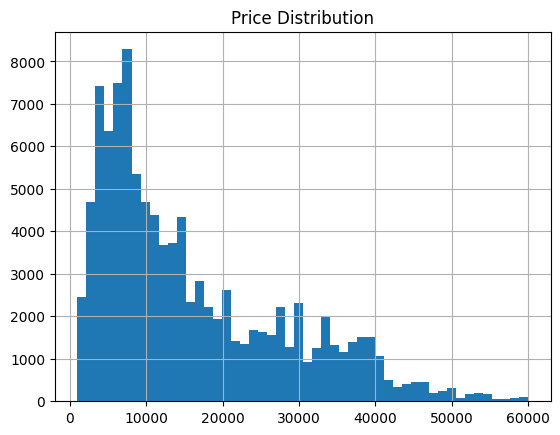

In [38]:
import matplotlib.pyplot as plt
df['price'].hist(bins=50)
plt.title("Price Distribution")